#Zone 19

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import numpy as np
import pandas as pd

Mounted at /content/drive/


In [ ]:
train_labels = np.load('/content/drive/MyDrive/train_labels.npy')
final_input_train = np.load('/content/drive/MyDrive/final_input_train.npy')
print(final_input_train)
print(train_labels)

[[[ 3.17625612e-01  9.98625457e-01  5.43307066e-01  4.54212613e-02]
  [ 3.17421317e-01  9.96892273e-01  5.57086587e-01  2.97924224e-02]
  [ 3.17225933e-01  9.95225251e-01  5.50196826e-01  4.95726578e-02]
  ...
  [ 3.25626695e-01  9.43756769e-01  3.98432101e-01  5.88605083e+00]
  [ 3.25709121e-01  9.43386649e-01  3.91688745e-01  6.17228202e+00]
  [ 3.25788947e-01  9.43030371e-01  3.85209240e-01  6.45007926e+00]]

 [[ 7.25498736e-01  2.61942536e-04  5.87598383e-01  5.36263764e-01]
  [ 7.26356314e-01  3.52670557e-03  5.86807685e-01  5.60623746e-01]
  [ 7.26785670e-01  5.17973496e-03  5.84282539e-01  5.58527328e-01]
  ...
  [ 7.51370651e-01  1.12126136e-01  4.87343076e-01  4.48863551e-01]
  [ 7.51363653e-01  1.12079785e-01  4.90528129e-01  5.19722140e-01]
  [ 7.51351559e-01  1.11995593e-01  4.95743161e-01  6.11091269e-01]]

 [[ 7.45045125e-01  5.18671656e-03  7.84448743e-01  9.03296769e-01]
  [ 7.43687272e-01  1.06671648e-02  5.12795269e-01  3.76312584e-01]
  [ 7.43989289e-01  1.45200090e-

In [ ]:
#shuffle arrays
shuffler = np.random.permutation(len(final_input_train))
final_input_train = final_input_train[shuffler]
train_labels = train_labels[shuffler]

#split into train and test
final_input_test = final_input_train[8869:]
arr = list(range(8869,final_input_train.shape[0] ))
print(final_input_test.shape)

final_input_train = np.delete(final_input_train, arr, 0)
print(final_input_train.shape)

test_labels = train_labels[8869:]
print(len(test_labels))

train_labels_final = train_labels[:8869]
print(len(train_labels_final))

#Get Unique values in each dataframe
unique = list(dict.fromkeys(test_labels))
unique2 = list(dict.fromkeys(train_labels_final))
print(unique)
print(unique2)

#One Hot Encode Types
from keras.utils.np_utils import to_categorical
test_labels = to_categorical(test_labels,num_classes = 7)
train_labels_final = to_categorical(train_labels_final,num_classes = 7)
print(len(test_labels))
print(len(train_labels_final))

(3801, 73, 4)
(8869, 73, 4)
3801
8869
[6, 5, 0, 3, 1, 4, 2]
[1, 6, 0, 5, 3, 4, 2]
3801
8869


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import keras
# fit and evaluate a model
verbose, epochs, batch_size = 2, 200, 16
n_timesteps, n_features, n_outputs = final_input_train.shape[1], final_input_train.shape[2], 7
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.0003)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit network
history =  model.fit(final_input_train, train_labels_final, epochs=epochs, batch_size=batch_size, verbose=verbose, shuffle = True)
# evaluate model
_, accuracy = model.evaluate(final_input_test, test_labels, batch_size=batch_size, verbose=0)
print(accuracy *100)

Epoch 1/200
555/555 - 7s - loss: 3.3270 - accuracy: 0.4878
Epoch 2/200
555/555 - 6s - loss: 2.3177 - accuracy: 0.5153
Epoch 3/200
555/555 - 6s - loss: 2.3490 - accuracy: 0.5337
Epoch 4/200
555/555 - 6s - loss: 1.9084 - accuracy: 0.5388
Epoch 5/200
555/555 - 6s - loss: 1.2675 - accuracy: 0.5492
Epoch 6/200
555/555 - 6s - loss: 1.2349 - accuracy: 0.5488
Epoch 7/200
555/555 - 6s - loss: 1.2178 - accuracy: 0.5518
Epoch 8/200
555/555 - 6s - loss: 1.2486 - accuracy: 0.5590
Epoch 9/200
555/555 - 6s - loss: 1.3240 - accuracy: 0.5571
Epoch 10/200
555/555 - 6s - loss: 1.2088 - accuracy: 0.5597
Epoch 11/200
555/555 - 6s - loss: 1.1929 - accuracy: 0.5615
Epoch 12/200
555/555 - 6s - loss: 1.1683 - accuracy: 0.5651
Epoch 13/200
555/555 - 6s - loss: 1.1645 - accuracy: 0.5671
Epoch 14/200
555/555 - 6s - loss: 1.1667 - accuracy: 0.5686
Epoch 15/200
555/555 - 6s - loss: 1.1473 - accuracy: 0.5706
Epoch 16/200
555/555 - 6s - loss: 1.1382 - accuracy: 0.5726
Epoch 17/200
555/555 - 6s - loss: 1.1349 - accura

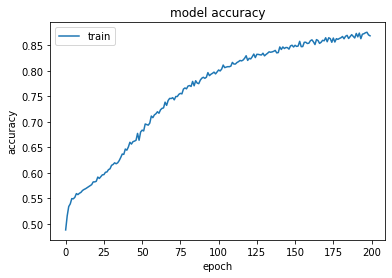

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

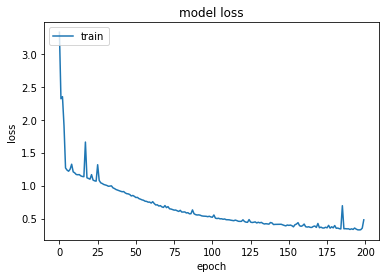

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
prediction = model.predict(final_input_test)

max_given_input = np.argmax(test_labels, axis=1)
max_predicted_output = np.argmax(prediction, axis=1)
print(max_given_input)
print(max_predicted_output)

[6 5 5 ... 0 6 0]
[0 5 0 ... 0 6 0]


In [ ]:
!pip install scikit-plot

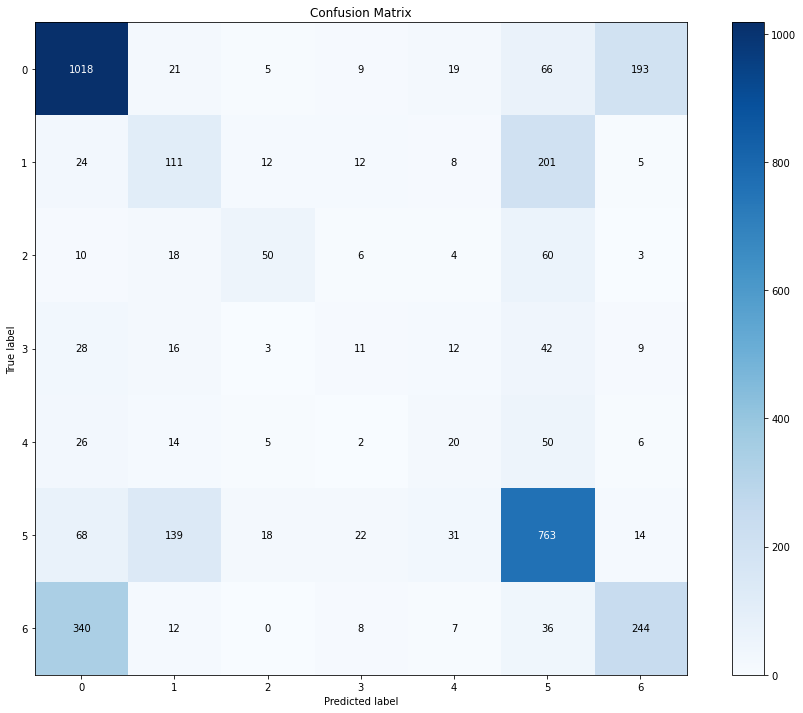

In [ ]:
from scikitplot.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(16,12))
plot_confusion_matrix(max_given_input, max_predicted_output, ax=ax)


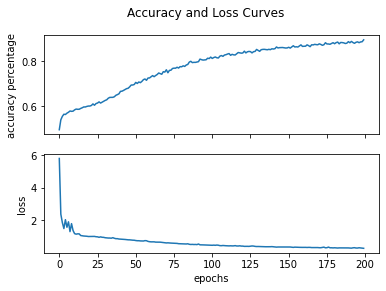

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Accuracy and Loss Curves')
ax1.plot(history.history['accuracy'])
ax2.plot(history.history['loss'])
ax1.set(ylabel='accuracy percentage')
ax2.set(xlabel='epochs', ylabel='loss')
plt.savefig("/content/drive/MyDrive/capstone_plot_300.png", dpi = 300)

#Zone 19 (Total Data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import numpy as np
import pandas as pd

Mounted at /content/drive/


In [ ]:
train_labels = np.load('/content/drive/MyDrive/Total AIS data/train_labels_total.npy')
final_input_train = np.load('/content/drive/MyDrive/Total AIS data/train_input_total.npy')
print(final_input_train)
print(train_labels)

[[[ 1.95521995e-01  9.98627126e-01  5.44477046e-01  4.54212613e-02]
  [ 1.95396826e-01  9.96893942e-01  5.58162272e-01  2.97924224e-02]
  [ 1.95277125e-01  9.95226920e-01  5.51319659e-01  4.95726578e-02]
  ...
  [ 2.00424033e-01  9.43758093e-01  4.00593748e-01  5.88605083e+00]
  [ 2.00474538e-01  9.43387955e-01  3.93896561e-01  6.17228202e+00]
  [ 2.00523449e-01  9.43031659e-01  3.87461420e-01  6.45007926e+00]]

 [[ 4.45409954e-01  2.61942972e-04  5.88465273e-01  5.36263764e-01]
  [ 4.45935383e-01  3.52671180e-03  5.87679986e-01  5.60623746e-01]
  [ 4.46198434e-01  5.17974402e-03  5.85172119e-01  5.58527328e-01]
  ...
  [ 4.61260663e-01  1.12126323e-01  4.88895990e-01  4.48863551e-01]
  [ 4.61256388e-01  1.12079972e-01  4.92059248e-01  5.19722140e-01]
  [ 4.61248987e-01  1.11995779e-01  4.97238594e-01  6.11091269e-01]]

 [[ 4.57385242e-01  5.18672541e-03  7.83968687e-01  9.03296769e-01]
  [ 4.56553370e-01  1.06671825e-02  5.14173985e-01  3.76312584e-01]
  [ 4.56738412e-01  1.45200333e-

In [ ]:
print(final_input_train.shape)
print(train_labels.shape)

(82729, 73, 4)
(82729,)


In [ ]:
searchval = 3
ii = np.where(train_labels == searchval)[0]
print(ii)

[    2   108   155   190   238   254   353   375   382   439   445   449
   458   462   464   485   553   554   688   714   715   724   737   768
   774   872   879   936  1036  1273  1279  1308  1323  1356  1378  1390
  1417  1438  1533  1562  1592  1604  1692  1697  1709  1712  1713  1714
  1769  1781  1985  2015  2052  2139  2140  2143  2146  2147  2150  2152
  2153  2158  2160  2221  2297  2344  2351  2367  2512  2558  2638  2651
  2841  2879  2888  2889  2894  2900  2910  2919  2953  2978  2992  3002
  3022  3037  3043  3044  3114  3116  3117  3118  3119  3120  3121  3122
  3124  3126  3131  3132  3133  3134  3291  3465  3503  3505  3507  3515
  3521  3569  3574  3585  3612  3613  3695  3703  3756  3759  3761  3783
  3792  3820  3855  3987  4053  4116  4294  4413  4426  4552  4709  4807
  4817  4838  4849  4855  4856  4869  4870  4881  4882  4883  4884  4885
  4886  4887  4888  4889  4890  4891  4892  4893  4894  4895  4911  4953
  4956  5121  5170  5175  5356  5411  5505  5517  5

In [ ]:
train_labels = np.delete(train_labels, ii)
print(train_labels)

[1 5 2 ... 1 1 4]


In [ ]:
final_input_train = np.delete(final_input_train,ii, axis = 0)
print(final_input_train.shape)
print(train_labels.shape)

(12242, 73, 4)
(12242,)


In [ ]:
#an_array = np.where(an_array > 20, 0, an_array)
train_labels = np.where(train_labels == 4, 3, train_labels)
train_labels = np.where(train_labels == 5, 4, train_labels)
train_labels = np.where(train_labels == 6, 5, train_labels)
print(train_labels)

[1 4 2 ... 1 1 3]


In [ ]:
#shuffle arrays
shuffler = np.random.permutation(len(final_input_train))
final_input_train = final_input_train[shuffler]
train_labels = train_labels[shuffler]

#split into train and test
final_input_test = final_input_train[57910:]
arr = list(range(57910,final_input_train.shape[0] ))
print(final_input_test.shape)

final_input_train = np.delete(final_input_train, arr, 0)
print(final_input_train.shape)

test_labels = train_labels[57910:]
print(len(test_labels))

train_labels_final = train_labels[:57910]
print(len(train_labels_final))

#Get Unique values in each dataframe
unique = list(dict.fromkeys(test_labels))
unique2 = list(dict.fromkeys(train_labels_final))
print(unique)
print(unique2)



(24819, 73, 4)
(57910, 73, 4)
24819
57910
[5, 2, 4, 0, 1, 6, 3]
[0, 4, 2, 5, 6, 1, 3]


In [ ]:
#One Hot Encode Types
from keras.utils.np_utils import to_categorical
test_labels = to_categorical(test_labels,num_classes = 7)
train_labels_final = to_categorical(train_labels_final,num_classes = 7)
print(len(test_labels))
print(len(train_labels_final))

24819
57910


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import keras
# fit and evaluate a model
verbose, epochs, batch_size = 2, 200, 16
n_timesteps, n_features, n_outputs = final_input_train.shape[1], final_input_train.shape[2], 7
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.0003)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit network
history =  model.fit(final_input_train, train_labels_final, epochs=epochs, batch_size=batch_size, verbose=verbose, shuffle = True)
# evaluate model
_, accuracy = model.evaluate(final_input_test, test_labels, batch_size=batch_size, verbose=0)
print(accuracy *100)

Epoch 1/200
3620/3620 - 42s - loss: 1.5924 - accuracy: 0.5307
Epoch 2/200
3620/3620 - 42s - loss: 1.3687 - accuracy: 0.5629
Epoch 3/200
3620/3620 - 43s - loss: 1.2545 - accuracy: 0.5755
Epoch 4/200
3620/3620 - 43s - loss: 1.1666 - accuracy: 0.5872
Epoch 5/200
3620/3620 - 43s - loss: 1.1032 - accuracy: 0.5982
Epoch 6/200
3620/3620 - 43s - loss: 1.0980 - accuracy: 0.6073
Epoch 7/200
3620/3620 - 43s - loss: 1.0565 - accuracy: 0.6166
Epoch 8/200
3620/3620 - 43s - loss: 1.0281 - accuracy: 0.6247
Epoch 9/200
3620/3620 - 43s - loss: 1.0122 - accuracy: 0.6349
Epoch 10/200
3620/3620 - 43s - loss: 1.0333 - accuracy: 0.6399
Epoch 11/200
3620/3620 - 42s - loss: 0.9570 - accuracy: 0.6506
Epoch 12/200
3620/3620 - 43s - loss: 0.9502 - accuracy: 0.6545
Epoch 13/200
3620/3620 - 43s - loss: 0.9313 - accuracy: 0.6573
Epoch 14/200
3620/3620 - 42s - loss: 0.9192 - accuracy: 0.6647
Epoch 15/200
3620/3620 - 43s - loss: 0.9064 - accuracy: 0.6719
Epoch 16/200
3620/3620 - 43s - loss: 0.8911 - accuracy: 0.6756
E

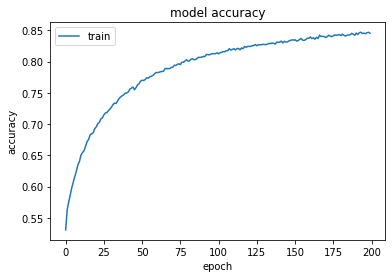

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

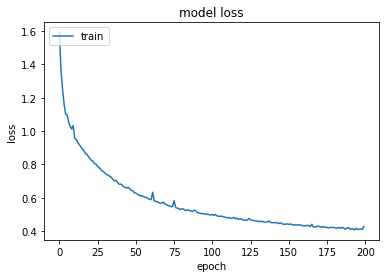

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
prediction = model.predict(final_input_test)

max_given_input = np.argmax(test_labels, axis=1)
max_predicted_output = np.argmax(prediction, axis=1)
print(max_given_input)
print(max_predicted_output)

[5 2 4 ... 3 1 1]
[5 5 5 ... 5 6 1]


In [ ]:
!pip install scikit-plot

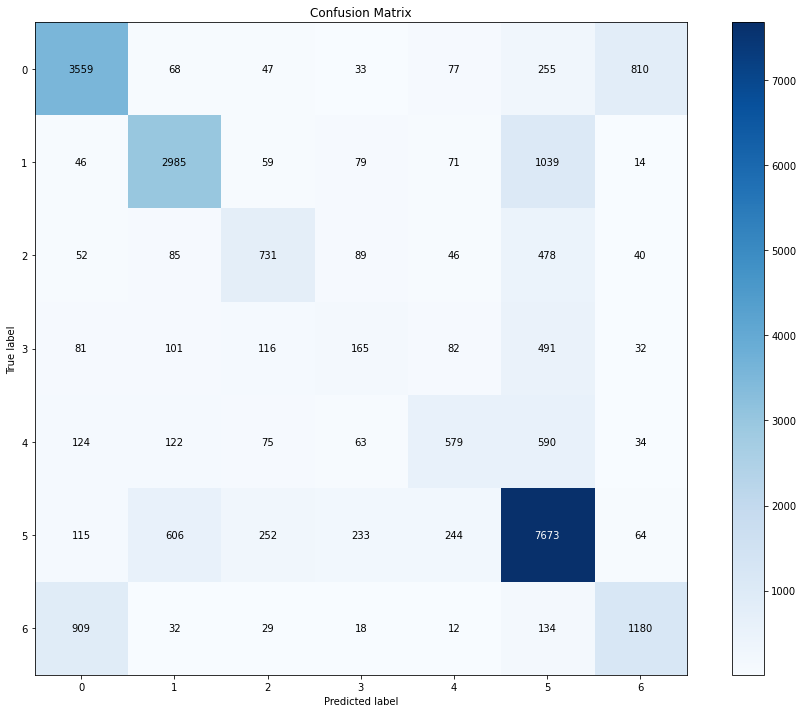

In [ ]:
from scikitplot.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(16,12))
plot_confusion_matrix(max_given_input, max_predicted_output, ax=ax)


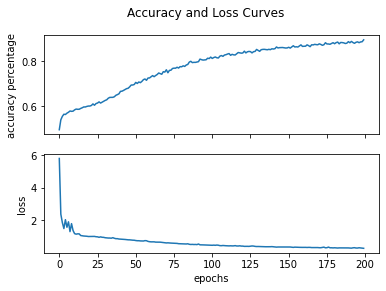

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Accuracy and Loss Curves')
ax1.plot(history.history['accuracy'])
ax2.plot(history.history['loss'])
ax1.set(ylabel='accuracy percentage')
ax2.set(xlabel='epochs', ylabel='loss')
plt.savefig("/content/drive/MyDrive/capstone_plot_300.png", dpi = 300)

In [ ]:
model.save('/content/drive/MyDrive/AIS-CNN-Zone19.model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/AIS-CNN-Zone19.model/assets


#Zone 19 (Total Data) (Removing type 3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import numpy as np
import pandas as pd

Mounted at /content/drive/


In [ ]:
train_labels = np.load('/content/drive/MyDrive/Total AIS data/train_labels_total.npy')
final_input_train = np.load('/content/drive/MyDrive/Total AIS data/train_input_total.npy')
print(final_input_train)
print(train_labels)

[[[ 1.95521995e-01  9.98627126e-01  5.44477046e-01  4.54212613e-02]
  [ 1.95396826e-01  9.96893942e-01  5.58162272e-01  2.97924224e-02]
  [ 1.95277125e-01  9.95226920e-01  5.51319659e-01  4.95726578e-02]
  ...
  [ 2.00424033e-01  9.43758093e-01  4.00593748e-01  5.88605083e+00]
  [ 2.00474538e-01  9.43387955e-01  3.93896561e-01  6.17228202e+00]
  [ 2.00523449e-01  9.43031659e-01  3.87461420e-01  6.45007926e+00]]

 [[ 4.45409954e-01  2.61942972e-04  5.88465273e-01  5.36263764e-01]
  [ 4.45935383e-01  3.52671180e-03  5.87679986e-01  5.60623746e-01]
  [ 4.46198434e-01  5.17974402e-03  5.85172119e-01  5.58527328e-01]
  ...
  [ 4.61260663e-01  1.12126323e-01  4.88895990e-01  4.48863551e-01]
  [ 4.61256388e-01  1.12079972e-01  4.92059248e-01  5.19722140e-01]
  [ 4.61248987e-01  1.11995779e-01  4.97238594e-01  6.11091269e-01]]

 [[ 4.57385242e-01  5.18672541e-03  7.83968687e-01  9.03296769e-01]
  [ 4.56553370e-01  1.06671825e-02  5.14173985e-01  3.76312584e-01]
  [ 4.56738412e-01  1.45200333e-

In [ ]:
print(final_input_train.shape)
print(train_labels.shape)

(82729, 73, 4)
(82729,)


In [ ]:
searchval = 3
ii = np.where(train_labels == searchval)[0]
print(ii)

[    2   108   155 ... 82519 82523 82719]


In [ ]:
train_labels = np.delete(train_labels, ii)
print(train_labels)

[1 5 2 ... 0 5 5]


In [ ]:
final_input_train = np.delete(final_input_train,ii, axis = 0)
print(final_input_train.shape)
print(train_labels.shape)

(79052, 73, 4)
(79052,)


In [ ]:
#an_array = np.where(an_array > 20, 0, an_array)
train_labels = np.where(train_labels == 4, 3, train_labels)
train_labels = np.where(train_labels == 5, 4, train_labels)
train_labels = np.where(train_labels == 6, 5, train_labels)
print(train_labels)

[1 4 2 ... 0 4 4]


In [ ]:
#shuffle arrays
shuffler = np.random.permutation(len(final_input_train))
final_input_train = final_input_train[shuffler]
train_labels = train_labels[shuffler]

#split into train and test
final_input_test = final_input_train[55336:]
arr = list(range(55336,final_input_train.shape[0] ))
print(final_input_test.shape)

final_input_train = np.delete(final_input_train, arr, 0)
print(final_input_train.shape)

test_labels = train_labels[55336:]
print(len(test_labels))

train_labels_final = train_labels[:55336]
print(len(train_labels_final))

#Get Unique values in each dataframe
unique = list(dict.fromkeys(test_labels))
unique2 = list(dict.fromkeys(train_labels_final))
print(unique)
print(unique2)



(23716, 73, 4)
(55336, 73, 4)
23716
55336
[1, 0, 2, 3, 4, 5]
[2, 0, 4, 3, 1, 5]


In [ ]:
#One Hot Encode Types
from keras.utils.np_utils import to_categorical
test_labels = to_categorical(test_labels,num_classes = 6)
train_labels_final = to_categorical(train_labels_final,num_classes = 6)
print(len(test_labels))
print(len(train_labels_final))

23716
55336


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import keras
# fit and evaluate a model
verbose, epochs, batch_size = 2, 200, 16
n_timesteps, n_features, n_outputs = final_input_train.shape[1], final_input_train.shape[2], 6
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.0003)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit network
history =  model.fit(final_input_train, train_labels_final, epochs=epochs, batch_size=batch_size, verbose=verbose, shuffle = True)
# evaluate model
_, accuracy = model.evaluate(final_input_test, test_labels, batch_size=batch_size, verbose=0)
print(accuracy *100)

Epoch 1/200
3459/3459 - 40s - loss: 1.3606 - accuracy: 0.5634
Epoch 2/200
3459/3459 - 40s - loss: 1.1677 - accuracy: 0.5909
Epoch 3/200
3459/3459 - 40s - loss: 1.0588 - accuracy: 0.6071
Epoch 4/200
3459/3459 - 40s - loss: 0.9989 - accuracy: 0.6194
Epoch 5/200
3459/3459 - 40s - loss: 0.9619 - accuracy: 0.6316
Epoch 6/200
3459/3459 - 41s - loss: 0.9314 - accuracy: 0.6417
Epoch 7/200
3459/3459 - 41s - loss: 0.9030 - accuracy: 0.6536
Epoch 8/200
3459/3459 - 41s - loss: 0.8804 - accuracy: 0.6602
Epoch 9/200
3459/3459 - 41s - loss: 0.8585 - accuracy: 0.6709
Epoch 10/200
3459/3459 - 41s - loss: 0.8397 - accuracy: 0.6771
Epoch 11/200
3459/3459 - 41s - loss: 0.8221 - accuracy: 0.6835
Epoch 12/200
3459/3459 - 41s - loss: 0.8090 - accuracy: 0.6878
Epoch 13/200
3459/3459 - 41s - loss: 0.7940 - accuracy: 0.6982
Epoch 14/200
3459/3459 - 41s - loss: 0.7807 - accuracy: 0.7010
Epoch 15/200
3459/3459 - 40s - loss: 0.7705 - accuracy: 0.7063
Epoch 16/200
3459/3459 - 40s - loss: 0.7593 - accuracy: 0.7094
E

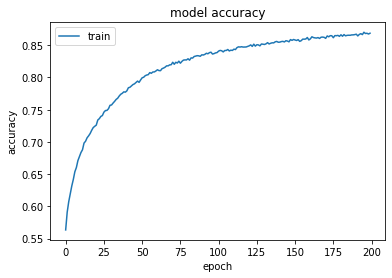

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

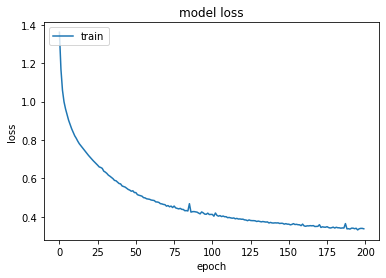

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
prediction = model.predict(final_input_test)

max_given_input = np.argmax(test_labels, axis=1)
max_predicted_output = np.argmax(prediction, axis=1)
print(max_given_input)
print(max_predicted_output)

[1 1 0 ... 2 4 0]
[1 1 0 ... 3 4 0]


In [ ]:
!pip install scikit-plot

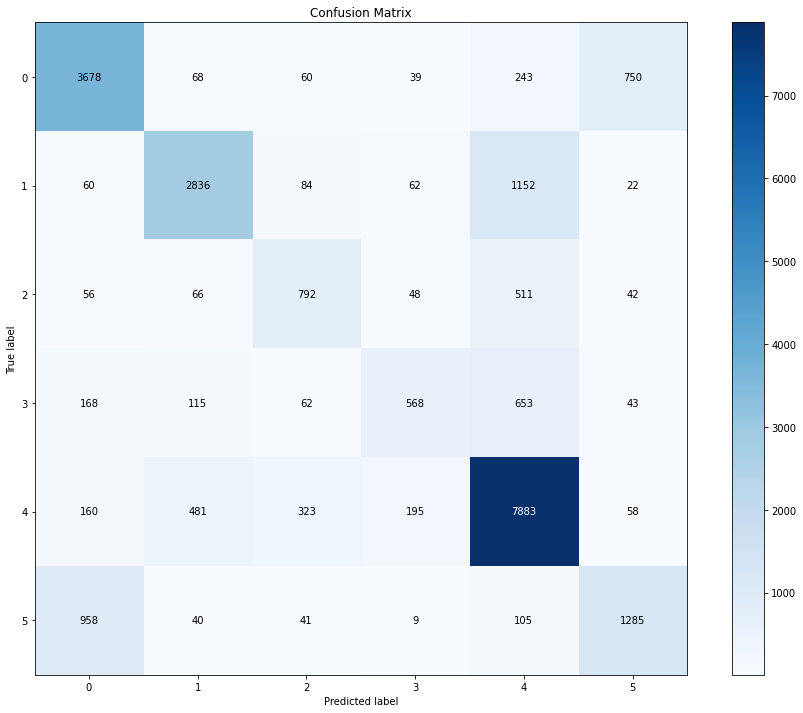

In [ ]:
from scikitplot.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(16,12))
plot_confusion_matrix(max_given_input, max_predicted_output, ax=ax)


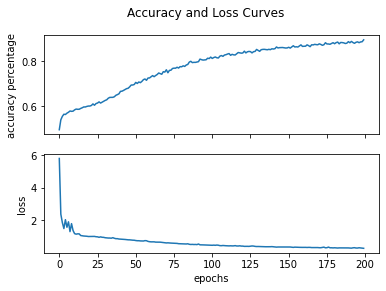

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Accuracy and Loss Curves')
ax1.plot(history.history['accuracy'])
ax2.plot(history.history['loss'])
ax1.set(ylabel='accuracy percentage')
ax2.set(xlabel='epochs', ylabel='loss')
plt.savefig("/content/drive/MyDrive/capstone_plot_300.png", dpi = 300)

In [ ]:
model.save('/content/drive/MyDrive/AIS-CNN-Zone19-no-other.model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/AIS-CNN-Zone19-no-other.model/assets
